In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)
import random
random.seed(1)

In [4]:
df = pd.read_csv('aug_train.csv')

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
df.shape

(19158, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [5]:
df = df.drop(columns=['city'], axis=1)

In [9]:
df

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [6]:
df['target'] = df['target'].astype('int')

In [7]:
df= df.replace({'relevent_experience': {'Has relevent experience': 1, 'No relevent experience': 0}})
df

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0.920,Male,1,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,0.776,Male,0,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,0.624,NaN,0,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,0.789,NaN,0,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,0.767,Male,1,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,Male,0,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1
19154,31398,0.920,Male,1,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1
19155,24576,0.920,Male,1,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0
19156,5756,0.802,Male,1,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0


In [8]:
for col in df:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
df.isnull().sum()

enrollee_id               0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [9]:
df['company_size'] = df['company_size'].str.replace('10/49', '10-49')

In [10]:
nominal = ['gender','enrolled_university', 'education_level', 'major_discipline', 'experience',
           'company_size', 'company_type', 'last_new_job']
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first')
hasil_ohe=ohe.fit(df[nominal])
df[hasil_ohe.get_feature_names(nominal)] = hasil_ohe.transform(df[nominal]).toarray()
df[hasil_ohe.get_feature_names(nominal)] = df[hasil_ohe.get_feature_names(nominal)].astype('int64')

import joblib
joblib.dump(hasil_ohe,"ohe.joblib")

['ohe.joblib']

In [11]:
df.drop(columns=nominal, inplace=True)

In [17]:
df

,enrollee_id,city_development_index,relevent_experience,training_hours,target,gender_Male,gender_Other,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,8949,0.920,1,36,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,29725,0.776,0,47,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,11561,0.624,0,83,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,33241,0.789,0,52,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,666,0.767,1,8,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,0,42,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
19154,31398,0.920,1,52,1,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
19155,24576,0.920,1,44,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
19156,5756,0.802,1,97,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0


In [12]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
df2=df
x_ = df2.drop(columns=['enrollee_id', 'target'], axis=1)
y_ = df2['target']
smote_x, smote_y = os.fit_resample(x_,y_)

In [ ]:
smote_y.value_counts()

In [13]:
from sklearn.model_selection import train_test_split
train_smote_X, test_smote_X, train_smote_Y, test_smote_Y = train_test_split(smote_x, smote_y, test_size=0.2,
                                                                           random_state=111)

# ANN

In [25]:
#Design ANN model
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_model(optimizer='adam'):
    classifier = Sequential()
    classifier.add(Dense(units = 16, input_dim = 54, activation = 'relu'))
    classifier.add(Dense(units = 24, activation = 'relu'))
    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 20, activation = 'relu'))
    classifier.add(Dense(units = 24, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy',
                   metrics =['accuracy'])
    return classifier


In [23]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


param_ann = {'optimizer':['SGD', 'RMSprop','Adam', 'Adamax', 'Nadam']}

In [26]:
classifier = KerasClassifier(build_fn=create_model)
cv_ann = GridSearchCV(estimator=classifier, param_grid=param_ann, n_jobs=-1, cv=3)
ann_model_cv = cv_ann.fit(train_smote_X, train_smote_Y, batch_size=64, epochs=100)

Epoch 1/100
360/360 [==============================] - 1s 2ms/step - loss: 0.7293 - accuracy: 0.5331
Epoch 2/100
360/360 [==============================] - 1s 2ms/step - loss: 0.6897 - accuracy: 0.5782
Epoch 3/100
360/360 [==============================] - 1s 2ms/step - loss: 0.6593 - accuracy: 0.6250
Epoch 4/100
360/360 [==============================] - 1s 2ms/step - loss: 0.6224 - accuracy: 0.6618
Epoch 5/100
360/360 [==============================] - 1s 2ms/step - loss: 0.5908 - accuracy: 0.6933
Epoch 6/100
360/360 [==============================] - 1s 2ms/step - loss: 0.5654 - accuracy: 0.7143
Epoch 7/100
360/360 [==============================] - 1s 2ms/step - loss: 0.5477 - accuracy: 0.7318
Epoch 8/100
360/360 [==============================] - 1s 2ms/step - loss: 0.5326 - accuracy: 0.7433
Epoch 9/100
360/360 [==============================] - 1s 2ms/step - loss: 0.5225 - accuracy: 0.7510
Epoch 10/100
360/360 [==============================] - 1s 2ms/step - loss: 0.5100 - accura

In [27]:
cv_ann.best_params_

{'optimizer': 'Adamax'}

In [28]:
pred_ann_cv= cv_ann.predict(test_smote_X)
from sklearn.metrics import roc_auc_score
roc_auc_score(test_smote_Y, pred_ann_cv)

0.8088811291946776

In [29]:
from sklearn.metrics import classification_report
print(classification_report(test_smote_Y, pred_ann_cv))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      2923
           1       0.79      0.84      0.81      2830

    accuracy                           0.81      5753
   macro avg       0.81      0.81      0.81      5753
weighted avg       0.81      0.81      0.81      5753



# With no cv for graph

In [18]:
train_X_33, val_X_3, train_Y_33, val_Y_3 = train_test_split(train_smote_X, train_smote_Y, test_size=0.2, random_state=111)

In [77]:
classifier2 = Sequential()
classifier2.add(Dense(units = 16, input_dim = 54, activation = 'relu'))
classifier2.add(Dense(units = 24, activation = 'relu'))
classifier2.add(Dropout(0.25))
classifier2.add(Dense(units = 20, activation = 'relu'))
classifier2.add(Dense(units = 24, activation = 'relu'))
classifier2.add(Dense(units = 1, activation = 'sigmoid'))
classifier2.compile(optimizer = 'adamax', loss = 'binary_crossentropy',
                   metrics =['accuracy'])

In [66]:
classifier2=classifier

In [78]:
#SMOTE
ann_model3 = classifier2.fit(train_X_33, train_Y_33,
                           batch_size = 64, epochs = 100, verbose = 2, validation_data=(val_X_3, val_Y_3))

Epoch 1/100
288/288 - 1s - loss: 0.9882 - accuracy: 0.4968 - val_loss: 0.6972 - val_accuracy: 0.5067
Epoch 2/100
288/288 - 0s - loss: 0.7273 - accuracy: 0.4945 - val_loss: 0.6940 - val_accuracy: 0.5291
Epoch 3/100
288/288 - 0s - loss: 0.7096 - accuracy: 0.5055 - val_loss: 0.6987 - val_accuracy: 0.5106
Epoch 4/100
288/288 - 1s - loss: 0.7020 - accuracy: 0.5199 - val_loss: 0.6899 - val_accuracy: 0.5372
Epoch 5/100
288/288 - 0s - loss: 0.6975 - accuracy: 0.5269 - val_loss: 0.6861 - val_accuracy: 0.6060
Epoch 6/100
288/288 - 0s - loss: 0.6938 - accuracy: 0.5489 - val_loss: 0.6787 - val_accuracy: 0.6204
Epoch 7/100
288/288 - 0s - loss: 0.6795 - accuracy: 0.5912 - val_loss: 0.6566 - val_accuracy: 0.6628
Epoch 8/100
288/288 - 0s - loss: 0.6566 - accuracy: 0.6319 - val_loss: 0.6385 - val_accuracy: 0.6569
Epoch 9/100
288/288 - 0s - loss: 0.6271 - accuracy: 0.6580 - val_loss: 0.6012 - val_accuracy: 0.6845
Epoch 10/100
288/288 - 1s - loss: 0.6014 - accuracy: 0.6857 - val_loss: 0.5756 - val_accura

Epoch 82/100
288/288 - 0s - loss: 0.4203 - accuracy: 0.8078 - val_loss: 0.4376 - val_accuracy: 0.7927
Epoch 83/100
288/288 - 0s - loss: 0.4185 - accuracy: 0.8069 - val_loss: 0.4409 - val_accuracy: 0.7916
Epoch 84/100
288/288 - 0s - loss: 0.4188 - accuracy: 0.8089 - val_loss: 0.4365 - val_accuracy: 0.7960
Epoch 85/100
288/288 - 0s - loss: 0.4205 - accuracy: 0.8086 - val_loss: 0.4426 - val_accuracy: 0.7936
Epoch 86/100
288/288 - 0s - loss: 0.4158 - accuracy: 0.8090 - val_loss: 0.4481 - val_accuracy: 0.7886
Epoch 87/100
288/288 - 0s - loss: 0.4161 - accuracy: 0.8097 - val_loss: 0.4381 - val_accuracy: 0.7942
Epoch 88/100
288/288 - 0s - loss: 0.4178 - accuracy: 0.8093 - val_loss: 0.4453 - val_accuracy: 0.7862
Epoch 89/100
288/288 - 0s - loss: 0.4160 - accuracy: 0.8114 - val_loss: 0.4370 - val_accuracy: 0.7938
Epoch 90/100
288/288 - 0s - loss: 0.4175 - accuracy: 0.8084 - val_loss: 0.4417 - val_accuracy: 0.7931
Epoch 91/100
288/288 - 0s - loss: 0.4190 - accuracy: 0.8094 - val_loss: 0.4494 - v

In [89]:
pred_ann4 = classifier2.predict_classes(test_smote_X)
from sklearn.metrics import roc_auc_score
roc_auc_score(test_smote_Y, pred_ann4)

0.7830281706316058

In [90]:
from sklearn.metrics import classification_report
print(classification_report(test_smote_Y, pred_ann4))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      2923
           1       0.73      0.89      0.80      2830

    accuracy                           0.78      5753
   macro avg       0.79      0.78      0.78      5753
weighted avg       0.80      0.78      0.78      5753



In [44]:
import shap
explainer = shap.KernelExplainer(cv_ann.predict, train_smote_X.iloc[:100, :])
shap_values = explainer.shap_values(test_smote_X.iloc[:20,:])

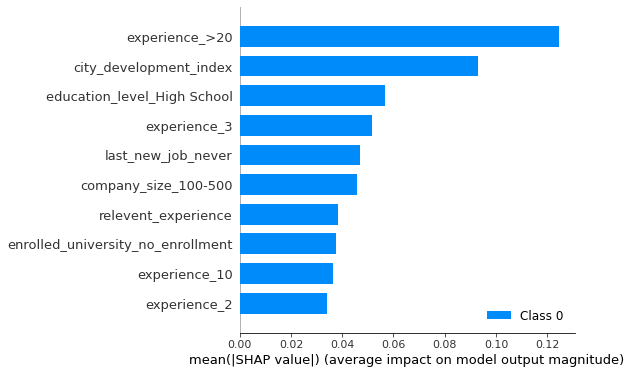

In [45]:
grph = shap.summary_plot(shap_values, features=train_smote_X, feature_names=train_smote_X.columns, 
                         max_display = 10, plot_size = (6,6))

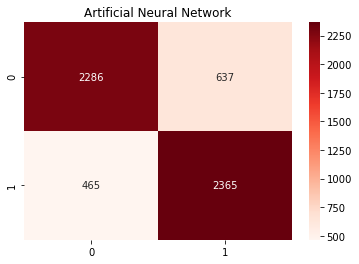

In [101]:
from sklearn.metrics import confusion_matrix 

CF_ann=confusion_matrix(test_smote_Y, pred_ann_cv)

sns.heatmap(CF_ann, annot=True, cmap = 'Reds', fmt = 'g') 
plt.title('Artificial Neural Network') 
plt.savefig('ann')

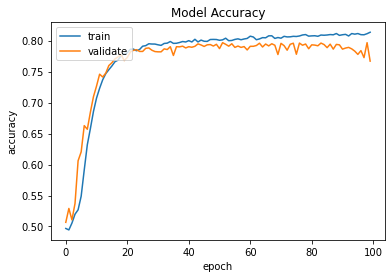

In [96]:
#using model without crossval for plot history
plt.plot(ann_model3.history['accuracy']) 
plt.plot(ann_model3.history['val_accuracy']) 
plt.title('Model Accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'validate'], loc = 'upper left') 
plt.savefig('Model Accuracy') 
plt.show()

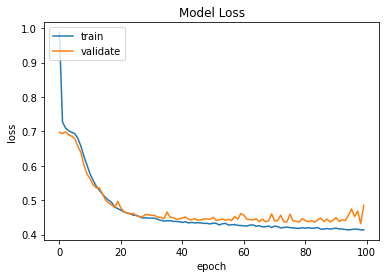

In [95]:
plt.plot(ann_model3.history['loss']) 
plt.plot(ann_model3.history['val_loss']) 
plt.title('Model Loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'validate'], loc = 'upper left') 
plt.savefig('Model Loss') 
plt.show()

# LBGM

In [ ]:
from lightgbm import LGBMClassifier
lgbm3 = LGBMClassifier(boosting_type='gbdt',
                             max_depth=10,num_leaves=131,n_jobs=-1, learning_rate=0.03)
lgbm3.fit(train_smote_X, train_smote_Y)
pred_lgbm3 = lgbm3.predict(test_smote_X)
from sklearn.metrics import roc_auc_score
roc_auc_score(test_smote_Y,pred_lgbm3)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_smote_Y, pred_lgbm3))

In [ ]:
from sklearn.metrics import confusion_matrix
CF_lgbm=confusion_matrix(test_smote_Y, pred_lgbm3)

sns.heatmap(CF_lgbm, annot=True, cmap = 'Reds', fmt = 'g')
plt.title('LightGBM')
plt.savefig('lgbm')

In [ ]:
from lightgbm import plot_importance

plot_importance(lgbm3, max_num_features=10,figsize=(6,6), grid=False,height=0.5,title='LightGBM Feature importance')
plt.tight_layout()
plt.savefig('lgbm fi')

# Logistic Regression

In [81]:
import statsmodels.api as sm 
exog = sm.add_constant(train_smote_X)
log_reg = sm.Logit(train_smote_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.418689
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                23009
Model:                          Logit   Df Residuals:                    22954
Method:                           MLE   Df Model:                           54
Date:                Fri, 11 Jun 2021   Pseudo R-squ.:                  0.3960
Time:                        14:46:45   Log-Likelihood:                -9633.6
converged:                       True   LL-Null:                       -15948.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   11.2140      0.2

In [82]:
pred_lg=log_reg.predict(sm.add_constant(test_smote_X))
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_smote_Y, np.round(pred_lg), target_names=target_names))

              precision    recall  f1-score   support

          No       0.79      0.85      0.82      2923
         Yes       0.83      0.77      0.80      2830

    accuracy                           0.81      5753
   macro avg       0.81      0.81      0.81      5753
weighted avg       0.81      0.81      0.81      5753



In [83]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_smote_Y,np.round(pred_lg))

0.8078299438231451

In [ ]:
from sklearn.metrics import confusion_matrix 
CF_lg=confusion_matrix(test_smote_Y, np.round(pred_lg))

sns.heatmap(CF_lg, annot=True, cmap = 'Reds', fmt = 'g') 
plt.title('Logistic Regression') 
plt.savefig('lg')

In [84]:
feat_imp_lg=pd.DataFrame(np.exp(log_reg.params))
feat_imp_lg=feat_imp_lg.iloc[1:]
feat_imp_lg.reset_index(inplace=True)
feat_imp_lg.rename(columns={0:'Value', 'index':'Feature'},inplace=True)

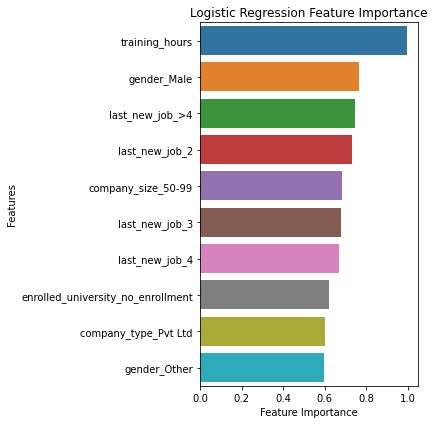

In [88]:
plt.figure(figsize=(6,6))
sns.barplot(data = feat_imp_lg.sort_values(by= 'Value', ascending=False).head(10), x= 'Value', y = 'Feature')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('lg fi')

# SVM

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm=SVC(C= 1, gamma= 0.1, kernel= 'linear')


from sklearn.preprocessing import StandardScaler

num_col = ['city_development_index', 'training_hours']

ss=StandardScaler()
train_smote_X2 = train_smote_X
test_smote_X2 = test_smote_X
train_smote_X2[num_col] = ss.fit_transform(train_smote_X[num_col])
test_smote_X2[num_col] = ss.transform(test_smote_X[num_col])

svm.fit(train_smote_X2, train_smote_Y)
pred_svm=svm.predict(test_smote_X2)
print(classification_report(test_smote_Y,pred_svm))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      2923
           1       0.83      0.77      0.80      2830

    accuracy                           0.81      5753
   macro avg       0.81      0.81      0.81      5753
weighted avg       0.81      0.81      0.81      5753



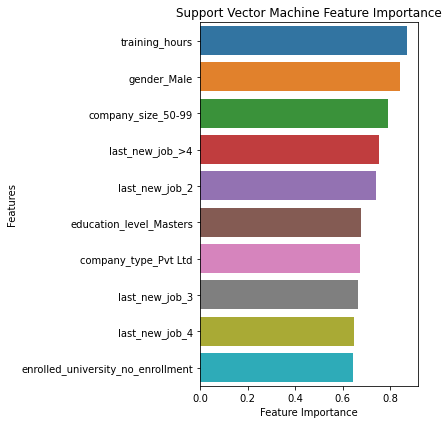

In [90]:
fimp_svm = pd.DataFrame({'Feature':train_smote_X.columns,'Value':np.exp(svm.coef_[0])})
plt.figure(figsize=(6,6))
sns.barplot(data = fimp_svm.sort_values(by= 'Value', ascending=False).head(10), x= 'Value', y = 'Feature')
plt.title('Support Vector Machine Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('svm fi')

# LGBM

In [115]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
lgbm = LGBMClassifier(boosting_type='gbdt',
                             max_depth=10,num_leaves=131,n_jobs=-1, learning_rate=0.03)
param_grid =  {'n_estimators' : [100,200,300,400,500,750,1000],
                  'scale_pos_weight':[1,2,6,12]}

cv_lgbm = GridSearchCV(lgbm, cv=3, param_grid=param_grid, scoring ='roc_auc')
cv_lgbm.fit(train_smote_X, train_smote_Y)

GridSearchCV(cv=3,
             estimator=LGBMClassifier(learning_rate=0.03, max_depth=10,
                                      num_leaves=131),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 750, 1000],
                         'scale_pos_weight': [1, 2, 6, 12]},
             scoring='roc_auc')

In [117]:
cv_lgbm.best_params_

{'n_estimators': 500, 'scale_pos_weight': 1}

In [118]:
pred_lgbm2 = cv_lgbm.predict(test_smote_X)
from sklearn.metrics import roc_auc_score
roc_auc_score(test_smote_Y,pred_lgbm2)

0.8385639542122969

In [119]:
print(classification_report(test_smote_Y, pred_lgbm2))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2923
           1       0.83      0.84      0.84      2830

    accuracy                           0.84      5753
   macro avg       0.84      0.84      0.84      5753
weighted avg       0.84      0.84      0.84      5753



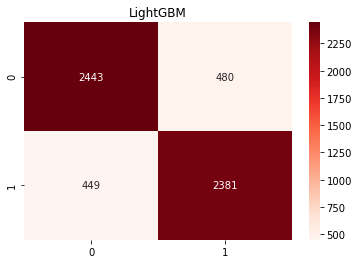

In [121]:
from sklearn.metrics import confusion_matrix
CF_lgbm=confusion_matrix(test_smote_Y, pred_lgbm2)

sns.heatmap(CF_lgbm, annot=True, cmap = 'Reds', fmt = 'g')
plt.title('LightGBM')
plt.savefig('lgbm')

In [136]:
from lightgbm import plot_importance

lgbm2 = LGBMClassifier(boosting_type='gbdt',
                        max_depth=10,num_leaves=131,n_jobs=-1, learning_rate=0.03, n_estimator=500,
                      scale_pos_weight=1)
lgbm2.fit(train_smote_X, train_smote_Y)

[LightGBM] [Warning] Unknown parameter: n_estimator


LGBMClassifier(learning_rate=0.03, max_depth=10, n_estimator=500,
               num_leaves=131, scale_pos_weight=1)

In [137]:
pred_lgbm3= lgbm2.predict(test_smote_X)
roc_auc_score(test_smote_Y,pred_lgbm3)

0.8221175664191275

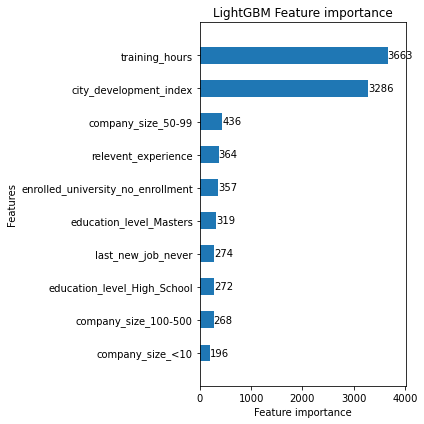

In [140]:
plot_importance(lgbm2, max_num_features=10,figsize=(6,6), grid=False,height=0.5,title='LightGBM Feature importance')
plt.tight_layout()
plt.tight_layout()
plt.savefig('cv_lgbm fi')

# TPOT

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.5, max_depth=9, max_features=0.45,
                           min_samples_leaf=18, min_samples_split=13,
                           random_state=123, subsample=0.9500000000000001)
gbc.fit(train_smote_X, train_smote_Y)

GradientBoostingClassifier(learning_rate=0.5, max_depth=9, max_features=0.45,
                           min_samples_leaf=18, min_samples_split=13,
                           random_state=123, subsample=0.9500000000000001)

In [142]:
pred_tpot=gbc.predict(test_smote_X) 
roc_auc_score(test_smote_Y,pred_tpot)

0.8380307153331261

In [143]:
print(classification_report(test_smote_Y, pred_tpot))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      2923
           1       0.84      0.83      0.83      2830

    accuracy                           0.84      5753
   macro avg       0.84      0.84      0.84      5753
weighted avg       0.84      0.84      0.84      5753



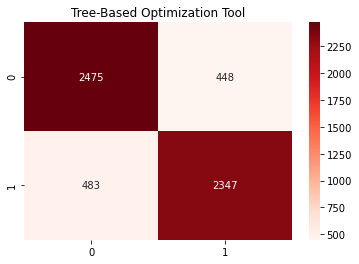

In [144]:
from sklearn.metrics import confusion_matrix 

CF_tpot=confusion_matrix(test_smote_Y, pred_tpot)

sns.heatmap(CF_tpot, annot=True, cmap = 'Reds', fmt = 'g') 
plt.title('Tree-Based Optimization Tool') 
plt.savefig('tpot')

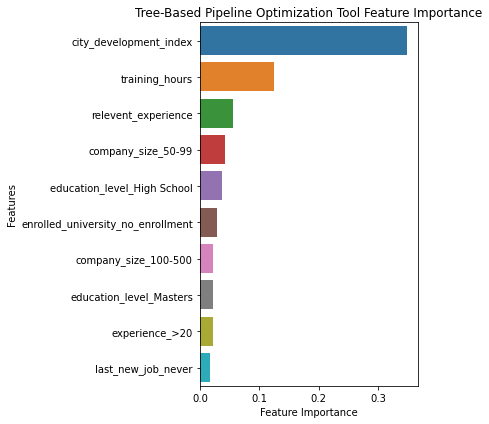

In [146]:
feat_imp_tpot = pd.DataFrame({'Value':gbc.feature_importances_, 'Feature':train_smote_X.columns})
plt.figure(figsize=(6,6))
sns.barplot(data = feat_imp_tpot.sort_values(by= 'Value', ascending=False).head(10), x= 'Value', y = 'Feature')
plt.title('Tree-Based Pipeline Optimization Tool Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
#plt.savefig('tpot fi')

# Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier

rfc_2 = RandomForestClassifier(random_state=123, criterion= 'entropy', max_features= 'auto', n_estimators= 100)
rfc_2.fit(train_smote_X, train_smote_Y)

RandomForestClassifier(criterion='entropy', random_state=123)

In [148]:
pred_rf2 = rfc_2.predict(test_smote_X)
roc_auc_score(test_smote_Y,pred_rf2)

0.8255041954330768

In [149]:
print(classification_report(test_smote_Y, pred_rf2))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      2923
           1       0.82      0.83      0.82      2830

    accuracy                           0.83      5753
   macro avg       0.83      0.83      0.83      5753
weighted avg       0.83      0.83      0.83      5753



# Decision Tree

In [150]:
from sklearn import tree
dtc_2 = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 14, min_samples_split= 75)
dtc_2.fit(train_smote_X, train_smote_Y)
pred_dtc2=dtc_2.predict(test_smote_X)
print(classification_report(test_smote_Y, pred_dtc2))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      2923
           1       0.75      0.84      0.79      2830

    accuracy                           0.78      5753
   macro avg       0.79      0.78      0.78      5753
weighted avg       0.79      0.78      0.78      5753



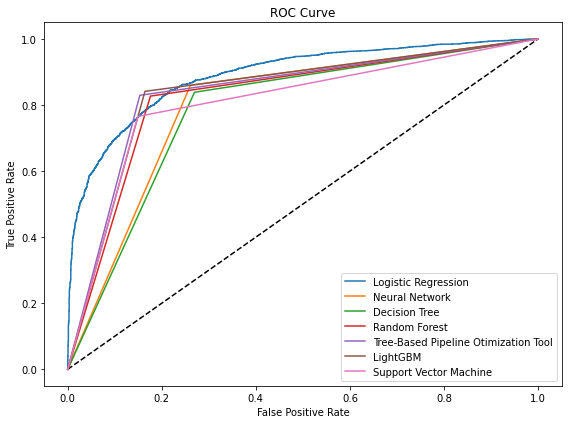

In [156]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr_lg, tpr_lg, thresholds_lg = roc_curve(test_smote_Y, pred_lg)
fpr_ann, tpr_ann, thresholds_ann = roc_curve(test_smote_Y, pred_ann3)
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(test_smote_Y, pred_dtc2)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(test_smote_Y, pred_rf2)
fpr_tpot, tpr_tpot, thresholds_tpot = roc_curve(test_smote_Y, pred_tpot)
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(test_smote_Y, pred_lgbm2)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(test_smote_Y, pred_svm)
# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lg, tpr_lg, label = 'Logistic Regression')
plt.plot(fpr_ann, tpr_ann, label = 'Neural Network')
plt.plot(fpr_dtc, tpr_dtc, label = 'Decision Tree')
plt.plot(fpr_rfc, tpr_rfc, label = 'Random Forest')
plt.plot(fpr_tpot, tpr_tpot, label = 'Tree-Based Pipeline Otimization Tool')
plt.plot(fpr_lgbm, tpr_lgbm, label = 'LightGBM')
plt.plot(fpr_svm, tpr_svm, label = 'Support Vector Machine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.savefig('roc curve')

# Model Deployment

In [ ]:
dt = pd.read_csv('aug_test.csv')
dt

In [ ]:
dt = dt.drop(columns=['city'], axis=1)
dt= dt.replace({'relevent_experience': {'Has relevent experience': 1, 'No relevent experience': 0}})
for col in dt:
    if dt[col].isnull().any():
            dt[col] = dt[col].fillna(dt[col].mode()[0])
            
dt['company_size'] = dt['company_size'].str.replace('10/49', '10-49')

In [ ]:
nominal = ['gender','enrolled_university', 'education_level', 'major_discipline', 'experience',
           'company_size', 'company_type', 'last_new_job']
hasil_ohe = joblib.load('ohe.joblib')
dt[hasil_ohe.get_feature_names(nominal)] = hasil_ohe.transform(dt[nominal]).toarray()
dt[hasil_ohe.get_feature_names(nominal)] = dt[hasil_ohe.get_feature_names(nominal)].astype('int64')
dt.drop(columns=nominal,inplace=True)

In [ ]:
def preprocessing(dt):
    dt = dt.drop(columns=['city'], axis=1)
    dt= dt.replace({'relevent_experience': {'Has relevent experience': 1, 'No relevent experience': 0}})
    for col in dt:
        if dt[col].isnull().any():
            dt[col] = dt[col].fillna(dt[col].mode()[0])
    dt['company_size'] = dt['company_size'].str.replace('10/49', '10-49')
    from sklearn.preprocessing import OneHotEncoder
    nominal = ['gender','enrolled_university', 'education_level', 'major_discipline', 'experience',
           'company_size', 'company_type', 'last_new_job']
    hasil_ohe = joblib.load('ohe.joblib')
    dt[hasil_ohe.get_feature_names(nominal)] = hasil_ohe.transform(dt[nominal]).toarray()
    dt[hasil_ohe.get_feature_names(nominal)] = dt[hasil_ohe.get_feature_names(nominal)].astype('int64')
    return hasil

In [ ]:
dt2=dt
dt2=dt2.drop(columns=['enrollee_id', 'target'])

In [ ]:
pred_new_ann = classifier.predict(dt2)
dt["target"]=np.round(pred_new_ann)
predict_ann=dt.loc[:,["enrollee_id","target"]]
predict_ann.to_csv("Prediksi ANN.csv", index=False)

In [ ]:
dt2=dt
dt2=dt2.drop(columns=['enrollee_id', 'target'])

In [ ]:
pred_new_tpot = tpot.predict(dt2)
dt["target"]=np.round(pred_new_tpot)
predict_tpot=dt.loc[:,["enrollee_id","target"]]
predict_tpot.to_csv("Prediksi TPOT.csv", index=False)

In [ ]:
dt2=dt
dt2=dt2.drop(columns=['enrollee_id', 'target'])

In [ ]:
pred_new_lgbm = lgbm3.predict(dt2)
dt["target"]=np.round(pred_new_lgbm)
predict_lgbm=dt.loc[:,["enrollee_id","target"]]
predict_lgbm.to_csv("Prediksi LGBM.csv", index=False)

In [ ]:
dt2=dt
dt2=dt2.drop(columns=['enrollee_id', 'target'])

In [ ]:
pred_new_rfc = rfc_2.predict(dt2)
dt["target"]=np.round(pred_new_rfc)
predict_rfc=dt.loc[:,["enrollee_id","target"]]
predict_rfc.to_csv("Prediksi RFC.csv", index=False)

In [ ]:
dt2=dt
dt2=dt2.drop(columns=['enrollee_id', 'target'])

In [ ]:
pred_new_dtc = dtc_2.predict(dt2)
dt["target"]=np.round(pred_new_dtc)
predict_dtc=dt.loc[:,["enrollee_id","target"]]
predict_dtc.to_csv("Prediksi DTC.csv", index=False)

In [ ]:
dt2=dt
dt2=dt2.drop(columns=['enrollee_id', 'target'])

In [ ]:
pred_new_svm = svm.predict(dt2)
dt["target"]=np.round(pred_new_svm)
predict_svm=dt.loc[:,["enrollee_id","target"]]
predict_svm.to_csv("Prediksi SVM.csv", index=False)

In [ ]:
dt2=dt
dt2=dt2.drop(columns=['enrollee_id', 'target'])

In [ ]:
pred_new_lg = log_reg.predict(sm.add_constant(dt2))
dt["target"]=np.round(pred_new_lg)
predict_lg=dt.loc[:,["enrollee_id","target"]]
predict_lg.to_csv("Prediksi LG.csv", index=False)